# 5.2.2 데이터 분할 및 대체

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 258.3/258.3 kB 1.6 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [ ]:
# 참조 코딩
import imblearn
print(imblearn.__version__)

0.12.3


In [ ]:
!pip install graphviz

In [ ]:
import graphviz

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_csv('/content/drive/MyDrive/기말고사 과제/2017DC1.csv')
df.shape
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Temperature      8751 non-null   float64
 1   Humidity         8751 non-null   float64
 2   Wind speed       8751 non-null   float64
 3   Visibility       8751 non-null   int64  
 4   Solar Radiation  8751 non-null   float64
 5   Rented Bike B    8751 non-null   float64
 6   Date             8751 non-null   float64
 7   Hour             8751 non-null   float64
 8   Seasons          8751 non-null   float64
 9   Functioning Day  8751 non-null   float64
 10  Holiday          8751 non-null   float64
dtypes: float64(10), int64(1)
memory usage: 752.2 KB


In [ ]:
# 참조 코딩 (아래 코딩을 실행 안해도 추후 결과는 동일합니다.)
# dtype을 category로 지정해 줄 변수들을 cols2에 임시 저장
cols2 = [ 'Rented Bike B', 'Date','Hour','Seasons', 'Functioning Day','Holiday']

df[cols2] = df[cols2].astype('category')   # cols2에 저장된 변수들의 dtype을 category로 변경
df.info()
df.tail(30)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8751 entries, 0 to 8750
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Temperature      8751 non-null   float64 
 1   Humidity         8751 non-null   float64 
 2   Wind speed       8751 non-null   float64 
 3   Visibility       8751 non-null   int64   
 4   Solar Radiation  8751 non-null   float64 
 5   Rented Bike B    8751 non-null   category
 6   Date             8751 non-null   category
 7   Hour             8751 non-null   category
 8   Seasons          8751 non-null   category
 9   Functioning Day  8751 non-null   category
 10  Holiday          8751 non-null   category
dtypes: category(6), float64(4), int64(1)
memory usage: 395.2 KB


,Temperature,Humidity,Wind speed,Visibility,Solar Radiation,Rented Bike B,Date,Hour,Seasons,Functioning Day,Holiday
8721,0.0,46.0,0.9,1566,0.00,1.0,13.0,18.0,0.0,1.0,1.0
8722,5.2,48.0,1.9,1590,0.00,1.0,13.0,19.0,0.0,1.0,1.0
8723,4.1,54.0,1.3,1434,0.00,1.0,13.0,20.0,0.0,1.0,1.0
8724,3.8,55.0,2.1,1231,0.00,1.0,13.0,21.0,0.0,1.0,1.0
8725,3.0,59.0,1.1,1218,0.00,1.0,13.0,22.0,0.0,1.0,1.0
8726,2.6,56.0,1.9,1394,0.00,1.0,13.0,23.0,0.0,1.0,1.0
8727,1.8,62.0,1.6,1411,0.00,0.0,13.0,0.0,0.0,1.0,1.0
8728,1.3,63.0,2.0,1379,0.00,0.0,13.0,1.0,0.0,1.0,1.0
8729,0.6,66.0,0.5,1368,0.00,0.0,13.0,2.0,0.0,1.0,1.0
8730,-0.1,69.0,0.9,1338,0.00,0.0,13.0,3.0,0.0,1.0,1.0


In [ ]:
data = df.drop(['Rented Bike B'], axis=1)   # 타겟변수를 제외한 변수만 data에 저장
target = df['Rented Bike B']                # 타겟변수만 target에 저장
data.shape

(8751, 10)

In [ ]:
target.shape

(8751,)

In [ ]:
# 50:50 비율로 데이터 분할
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    data, target, test_size=0.5, random_state=42, stratify = target)

print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)

X_train shape: (4375, 10)
X_test shape: (4376, 10)


In [ ]:
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

y_train shape: (4375,)
y_test shape: (4376,)


In [ ]:
y_train.value_counts(normalize=True)

Rented Bike B
1.0    0.500114
0.0    0.499886
Name: proportion, dtype: float64

In [ ]:
y_train.value_counts()

Rented Bike B
1.0    2188
0.0    2187
Name: count, dtype: int64

# 5.3 결정 트리(Decision Tree) 분류 모델

In [ ]:
# Decision Tree 모델 (Default인 GINI기준이자 Maximal depth 조건)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
tree = DecisionTreeClassifier(random_state=0)   # Classifier로 DecisionTreeClassifer 지정
model = tree.fit(X_train, y_train)   # Clssifier를 트레이닝 데이터셋에서 학습시킴
pred = model.predict(X_test)  # 학습된 Classifier로 테스트 데이터셋 자료이용해서 타겟변수 예측값 생성

print("Accuracy(GINI) on training set:{:.5f}".format(model.score(X_train, y_train)))
print("Accuracy(GINI) on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy(GINI) on training set:1.00000
Accuracy(GINI) on test set:0.90014


In [ ]:
# Decision Tree 모델 (Gini 기준)
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

tree = DecisionTreeClassifier(criterion="gini", random_state=0, max_depth=5)

params = {'criterion':['gini','entropy'],'max_depth': range(1,21)}

grid_tree = GridSearchCV(tree, param_grid=params, scoring='accuracy', cv=5, n_jobs=-1,
                     verbose=1)
grid_tree.fit(X_train, y_train)

print("GridSearchCV max accuracy:{:.5f}".format(grid_tree.best_score_))
print("GridSearchCV best parameter:", (grid_tree.best_params_))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
GridSearchCV max accuracy:0.90697
GridSearchCV best parameter: {'criterion': 'gini', 'max_depth': 5}


In [ ]:
# 참조 코딩
# range() 함수의 결과를 디스플레이

for i in range(1,21):
    print(i, end =" ")

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 

In [ ]:
best_clf = grid_tree.best_estimator_
pred = best_clf.predict(X_test)
print("Accuracy on test set:{:.5f}".format(accuracy_score(y_test, pred)))

Accuracy on test set:0.91248


In [ ]:
# 참조 코딩
from sklearn.metrics import roc_auc_score
ROC_AUC = roc_auc_score(y_test,best_clf.predict_proba(X_test)[:, 1])
print("ROC AUC on test set:{:.5f}".format(ROC_AUC))

ROC AUC on test set:0.95070


In [ ]:
print ("Feature importances:")
print (best_clf.feature_importances_)

Feature importances:
[0.39554956 0.13104406 0.00178033 0.00119309 0.01742965 0.
 0.30056659 0.04936873 0.10306799 0.        ]


In [ ]:
# 변수명을 Index로 만들고 feature_importances를 매칭해서 나열한 데이터프레임 만들기

feature_names = list(data.columns)   # 변수명(컬럼명)을 리스트 형태로 만들기
dft = pd.DataFrame(np.round(best_clf.feature_importances_, 4), index=feature_names,
                   columns=['Feature_importances'])
dft1 = dft.sort_values(by='Feature_importances', ascending=False)
dft1                                 # 컬럼 Feature_importances의 값들을 내림차순으로 정리

,Feature_importances
Temperature,0.3955
Hour,0.3006
Humidity,0.1310
Functioning Day,0.1031
Seasons,0.0494
Solar Radiation,0.0174
Wind speed,0.0018
Visibility,0.0012
Date,0.0000
Holiday,0.0000


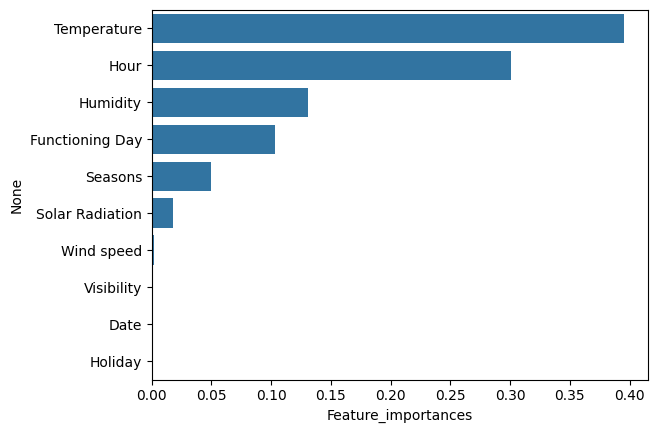

In [ ]:
# 데이터프레임 dft1의 막대그래프 그리기

import seaborn as sns
sns.barplot(y=dft1.index, x="Feature_importances", data=dft1);

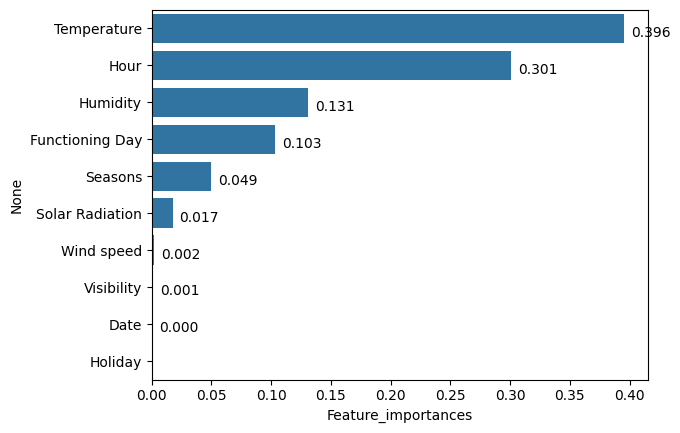

In [ ]:
# 참조 코딩
# 데이터프레임 dft1의 막대그래프 그리기 및 값 표시
import matplotlib.pyplot as plt
%matplotlib inline

ax = sns.barplot(y=dft1.index, x="Feature_importances", data=dft1)

for p in ax.patches:
    ax.annotate("%.3f" % p.get_width(), (p.get_x() + p.get_width(), p.get_y()+1),
                xytext=(5, 10), textcoords='offset points')

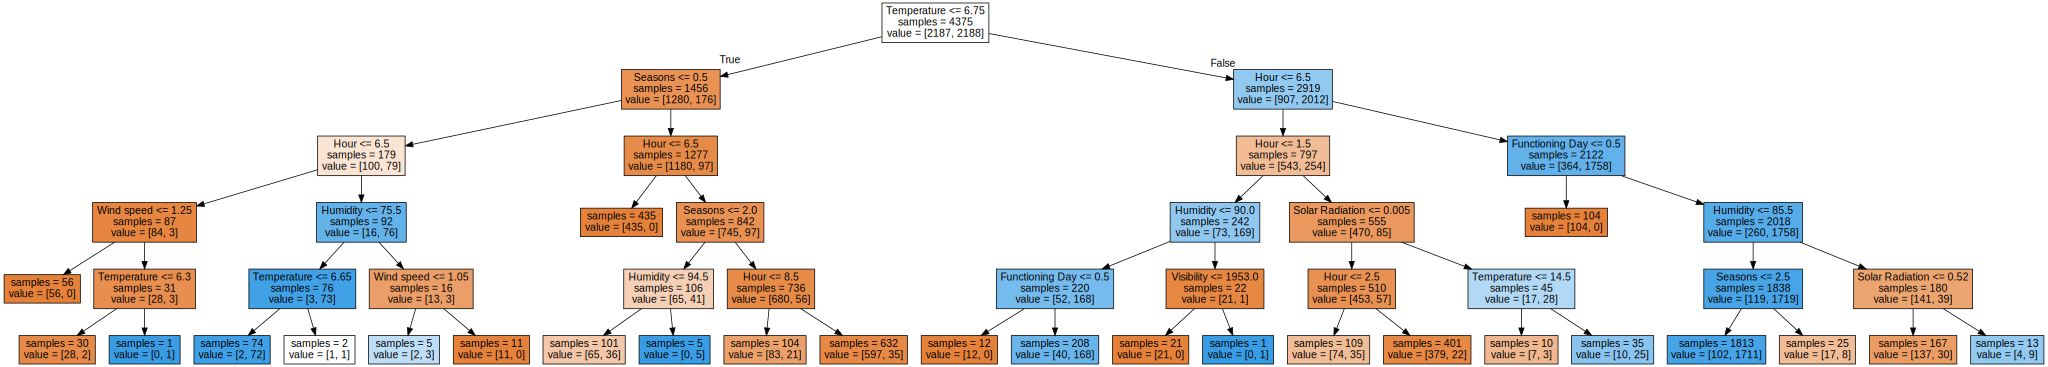

In [ ]:
# model의 결과물을 tree.dot에 저장
import graphviz
from sklearn.tree import export_graphviz
export_graphviz(best_clf, out_file = "tree.dot",
                feature_names = list(data.columns), impurity = False , filled = True )

# tree.dot을 graphviz 기능을 통해 디스플레이.
import graphviz
with open("tree.dot") as f:
    dot_graph = f.read()
display(graphviz.Source(dot_graph))

In [ ]:
# 참조 코딩
# 위의 코딩문으로 graphviz가 설치됐는데도 코랩에서 결정트리 결과물 디스플레이가 안될 때
# 추가로 시도해 보는 코드

# Install graphviz on Colab
!apt-get -qq install -y graphviz && pip install -q pydot
import pydot